In [43]:
import torch; torch.manual_seed(0)
import torch.nn as nn
import torch.nn.functional as F
import torch.utils
import torch.distributions
import torchvision
import numpy as np
import matplotlib.pyplot as plt; plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = [3, 3]

In [44]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [45]:
class Encoder(nn.Module):
    def __init__(self, latent_dims):
        super(Encoder, self).__init__()
        #self.linear1 = nn.Linear(784, 512)
        #self.linear2 = nn.Linear(512, latent_dims)

        self.linear3 = nn.Linear(784,latent_dims)
    def forward(self, x):
        #x = torch.flatten(x, start_dim=1)
        #x = F.relu(self.linear1(x))
        #return self.linear2(x)

        x = torch.flatten(x, start_dim=1)
        return F.relu(self.linear3(x))

In [46]:
class Decoder(nn.Module):
    def __init__(self, latent_dims):
        super(Decoder, self).__init__()
        #self.linear1 = nn.Linear(latent_dims, 512)
        #self.linear2 = nn.Linear(512, 784)

        self.linear3 = nn.Linear(latent_dims,784)
    def forward(self, z):
        #z = F.relu(self.linear1(z))
        #z = torch.sigmoid(self.linear2(z))
        #return z.reshape((-1, 1, 28, 28))

        return torch.sigmoid(self.linear3(z)).reshape((-1, 1, 28, 28))

In [47]:
class Autoencoder(nn.Module):
    def __init__(self, latent_dims):
        super(Autoencoder, self).__init__()
        self.encoder = Encoder(latent_dims)
        self.decoder = Decoder(latent_dims)

    def forward(self, x):
        z = self.encoder(x)
        return self.decoder(z)

In [48]:
def train(autoencoder, data, epochs=20):
    opt = torch.optim.Adam(autoencoder.parameters())
    for epoch in range(epochs):
        total_loss = 0.0
        for x, y in data:
            x = x.to(device) # GPU
            opt.zero_grad()
            x_hat = autoencoder(x)
            loss = ((x - x_hat)**2).sum()
            total_loss+=loss/128
            loss.backward()
            opt.step()
        if epoch%5 == 0:
            print("Epoch == ",epoch,"  Loss == ",total_loss.item()/len(data))
    return autoencoder

In [49]:
latent_dims = 10
autoencoder = Autoencoder(latent_dims).to(device) # GPU

data = torch.utils.data.DataLoader(
        torchvision.datasets.MNIST('./data',
               transform=torchvision.transforms.ToTensor(),
               download=True),
        batch_size=128,
        shuffle=True)

In [50]:
autoencoder = train(autoencoder, data, epochs = 30)

Epoch ==  0   Loss ==  71.95016824360341
Epoch ==  5   Loss ==  32.03270339152452
Epoch ==  10   Loss ==  29.191903901252665
Epoch ==  15   Loss ==  28.812460437766525
Epoch ==  20   Loss ==  28.675348147654585
Epoch ==  25   Loss ==  28.60083996868337


In [51]:
image, target = next(iter(data))

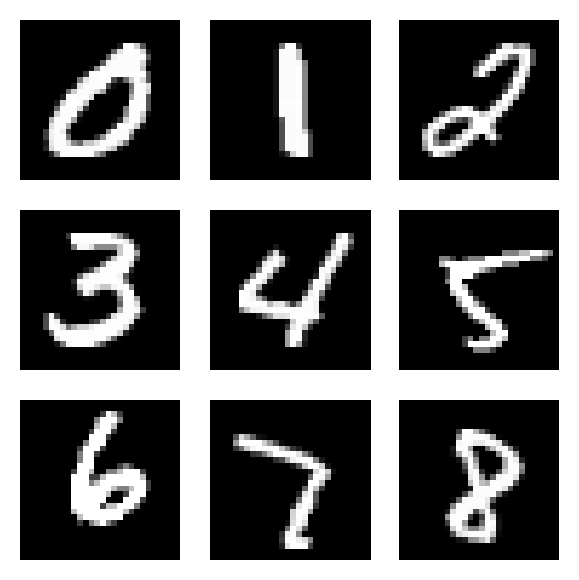

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random images for demonstration
images = [image[target==i][1].cpu().detach().numpy().reshape(28,28) for i in range(9)]

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3)

# Iterate over the images and corresponding axes
for img, ax in zip(images, axes.flatten()):
    ax.imshow(img, cmap='gray')  # Display the image
    ax.axis('off')  # Turn off the axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

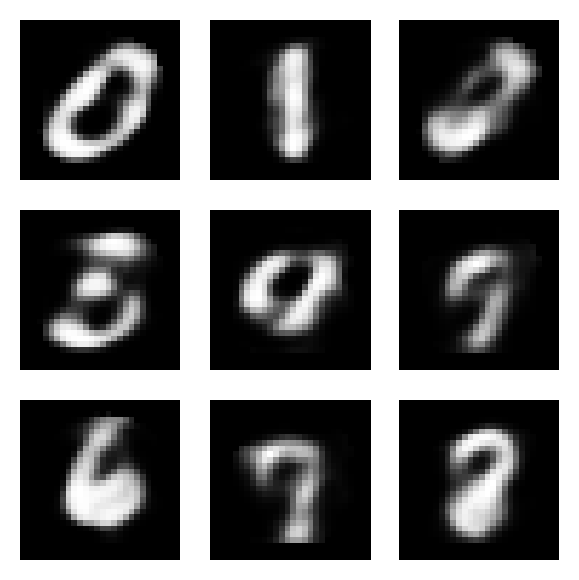

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random images for demonstration
images = [autoencoder((image[target==i][1]).to(device).reshape(1,1,28,28)).cpu().detach().numpy().reshape(28,28) for i in range(9)]

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3)

# Iterate over the images and corresponding axes
for img, ax in zip(images, axes.flatten()):
    ax.imshow(img, cmap='gray')  # Display the image
    ax.axis('off')  # Turn off the axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


![Image](autoencoder_weights.png)

In [54]:
weights = autoencoder.encoder.linear3.weight
weights.shape

torch.Size([10, 784])

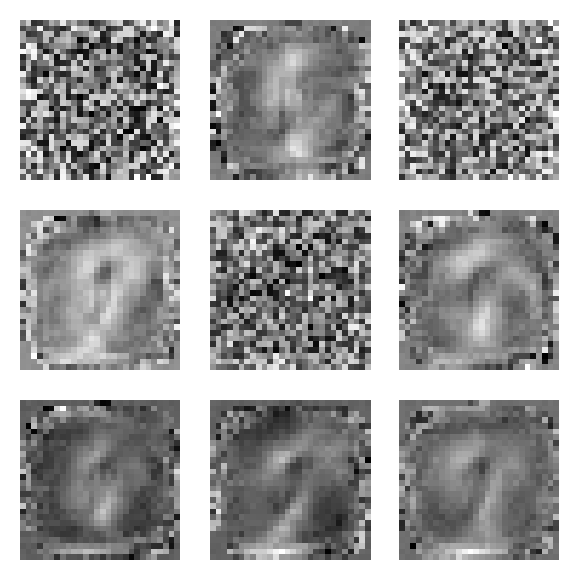

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some random images for demonstration
images = [weights[i,:].cpu().detach().numpy().reshape(28,28) for i in range(9)]

# Create a figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3)

# Iterate over the images and corresponding axes
for img, ax in zip(images, axes.flatten()):
    ax.imshow(img, cmap='gray')  # Display the image
    ax.axis('off')  # Turn off the axis labels

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()
